# Convolutional Neural Network Image Classification Project

In [141]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Generate a tf.data.Dataset

In [142]:
base_dir = 'C:/Users/schre/OneDrive/Documents/Python/Data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

### List the folders to see their arrangement

In [143]:
os.listdir(base_dir)

['test', 'train', 'valid']

### Create train, test and validation datasets

In [144]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
seed=101,
image_size=(200, 200),
batch_size=32)

Found 613 files belonging to 4 classes.


In [145]:
testing_set = tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
seed=101,
image_size=(200, 200),
batch_size=32)

Found 315 files belonging to 4 classes.


In [146]:
valid_set = tf.keras.preprocessing.image_dataset_from_directory(
valid_dir,
seed=101,
image_size=(200, 200),
batch_size=32)

Found 72 files belonging to 4 classes.


## Early Stopping

In [147]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=20)
]

## Data Augmentation

In [148]:
data_augmentation = tf.keras.Sequential(
  [tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(200,200,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),]
)

## Build CNN

In [149]:
model = Sequential([
    #data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='softmax')
])

### Compile Model

In [155]:
model.compile(optimizer='adam',
              #loss=keras.losses.BinaryCrossentropy(from_logits=True),
              loss=keras.losses.CategoricalCrossentropy(),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              #loss=keras.losses.mse,
              metrics=[keras.metrics.Accuracy()])

### Train the model

In [156]:
history = model.fit(training_set,validation_data=valid_set, epochs=600,callbacks=callbacks)

Epoch 1/600


c:\Users\schre\anaconda3\envs\dev\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 3s 102ms/step - loss: 0.0000e+00 - accuracy: 0.1876 - val_loss: 0.0000e+00 - val_accuracy: 0.2917
Epoch 2/600
20/20 [==============================] - 2s 93ms/step - loss: 0.0000e+00 - accuracy: 0.1876 - val_loss: 0.0000e+00 - val_accuracy: 0.2917
Epoch 3/600
20/20 [==============================] - 2s 92ms/step - loss: 0.0000e+00 - accuracy: 0.1876 - val_loss: 0.0000e+00 - val_accuracy: 0.2917
Epoch 4/600
20/20 [==============================] - 2s 96ms/step - loss: 0.0000e+00 - accuracy: 0.1876 - val_loss: 0.0000e+00 - val_accuracy: 0.2917
Epoch 5/600
20/20 [==============================] - 2s 91ms/step - loss: 0.0000e+00 - accuracy: 0.1876 - val_loss: 0.0000e+00 - val_accuracy: 0.2917
Epoch 6/600
20/20 [==============================] - 2s 91ms/step - loss: 0.0000e+00 - accuracy: 0.1876 - val_loss: 0.0000e+00 - val_accuracy: 0.2917
Epoch 7/600
20/20 [==============================] - 2s 92ms/step - loss: 0.0000e+00 - accuracy: 0.1876 - val_l

# Model attempt 2: use notebook from kaggle as inspiration


link: https://www.kaggle.com/code/prthmgoyl/ensemblemodel-ctscan

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Model, load_model, Sequential
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

In [44]:
def define_paths(dir):
    filepaths = []
    labels = []
    folds = os.listdir(dir)
    for fold in folds:
        foldpath = os.path.join(dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)
    return filepaths, labels
def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)

def create_df(tr_dir, val_dir, ts_dir):
    # train dataframe
    files, classes = define_paths(tr_dir)
    train_df = define_df(files, classes)
    
    # validation dataframe
    files, classes = define_paths(val_dir)
    valid_df = define_df(files, classes)
    # test dataframe
    files, classes = define_paths(ts_dir)
    test_df = define_df(files, classes)
    return train_df, valid_df, test_df

In [46]:
def create_gens(train_df, valid_df, test_df, batch_size):
    img_size = (224, 224)
    channels = 3
    img_shape = (img_size[0], img_size[1], channels)
    ts_length = len(test_df)
    test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size
    def scalar(img):
        return img
    #class_mode= 'categorical'
    #class_mode='sparse'
    tr_gen = ImageDataGenerator(preprocessing_function= scalar, horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)
    train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode='categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)
    valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode='categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)
    test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode='categorical',
                                        color_mode= 'rgb', shuffle= False, batch_size= test_batch_size)
    return train_gen, valid_gen, test_gen

In [47]:
# Get Dataframes
base_dir = 'C:/Users/schre/OneDrive/Documents/Python/Data'
train_dir = 'C:/Users/schre/OneDrive/Documents/Python/Data/train'
test_dir = 'C:/Users/schre/OneDrive/Documents/Python/Data/valid'
valid_dir = 'C:/Users/schre/OneDrive/Documents/Python/Data/test'
train_df, valid_df, test_df = create_df(train_dir, valid_dir, test_dir)

# Get Generators
batch_size = 40
train_gen, valid_gen, test_gen = create_gens(train_df, valid_df, test_df, batch_size)

Found 613 validated image filenames belonging to 4 classes.
Found 315 validated image filenames belonging to 4 classes.
Found 72 validated image filenames belonging to 4 classes.


In [48]:
train_df

,filepaths,labels
0,C:/Users/schre/OneDrive/Documents/Python/Data/...,adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
1,C:/Users/schre/OneDrive/Documents/Python/Data/...,adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
2,C:/Users/schre/OneDrive/Documents/Python/Data/...,adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
3,C:/Users/schre/OneDrive/Documents/Python/Data/...,adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
4,C:/Users/schre/OneDrive/Documents/Python/Data/...,adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
...,...,...
608,C:/Users/schre/OneDrive/Documents/Python/Data/...,squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
609,C:/Users/schre/OneDrive/Documents/Python/Data/...,squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
610,C:/Users/schre/OneDrive/Documents/Python/Data/...,squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
611,C:/Users/schre/OneDrive/Documents/Python/Data/...,squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


## First pass at base CNN model

In [49]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Create convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [50]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_104 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_105 (Conv2D)         (None, 52, 52, 64)        36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [51]:
# Add dense layers to finish model 
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

In [52]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_104 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_105 (Conv2D)         (None, 52, 52, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 173056)           

In [53]:
train_gen.labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [54]:
model.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(
              #    from_logits=True
              #    ),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_gen, epochs=100, 
                    validation_data=(test_gen))

Epoch 1/100
16/16 [==============================] - 7s 379ms/step - loss: 7.9205 - accuracy: 0.2496 - val_loss: 8.6236 - val_accuracy: 0.2917
Epoch 2/100
16/16 [==============================] - 3s 220ms/step - loss: 7.1772 - accuracy: 0.1876 - val_loss: 8.0590 - val_accuracy: 0.2917
Epoch 3/100
16/16 [==============================] - 3s 207ms/step - loss: 8.5192 - accuracy: 0.1876 - val_loss: 8.0590 - val_accuracy: 0.2917
Epoch 4/100
16/16 [==============================] - 3s 206ms/step - loss: 9.0188 - accuracy: 0.1876 - val_loss: 8.0590 - val_accuracy: 0.2917
Epoch 5/100
16/16 [==============================] - 3s 200ms/step - loss: 9.0188 - accuracy: 0.1876 - val_loss: 8.0590 - val_accuracy: 0.2917
Epoch 6/100
16/16 [==============================] - 3s 208ms/step - loss: 9.0188 - accuracy: 0.1876 - val_loss: 8.0590 - val_accuracy: 0.2917
Epoch 7/100
16/16 [==============================] - 3s 205ms/step - loss: 9.0188 - accuracy: 0.1876 - val_loss: 8.0590 - val_accuracy: 0.2917

## First pass at pretrained model

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Assuming train_gen and valid_gen are your image data generators

img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

# Create pre-trained model
base_model = tf.keras.applications.EfficientNetB3(include_top=False, 
                                                  weights="imagenet", 
                                                  input_shape=img_shape, pooling='max')
for layer in base_model.layers:
    layer.trainable = False
model = Sequential([
    base_model,
    BatchNormalization(axis=-1),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(class_count, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define filepath to save the best model
filepath = 'best_model.h5'

# Create ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model with the added callback
history = model.fit(
    x=train_gen,
    epochs=100,
    verbose=1,
    validation_data=valid_gen,
    callbacks=[checkpoint]
)

Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 1.1133 - accuracy: 0.6020
Epoch 1: val_accuracy improved from -inf to 0.56508, saving model to best_model.h5
16/16 [==============================] - 16s 740ms/step - loss: 1.1133 - accuracy: 0.6020 - val_loss: 2.1191 - val_accuracy: 0.5651
Epoch 2/100


c:\Users\schre\anaconda3\envs\dev\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - ETA: 0s - loss: 0.5487 - accuracy: 0.7961
Epoch 2: val_accuracy improved from 0.56508 to 0.67302, saving model to best_model.h5
16/16 [==============================] - 10s 603ms/step - loss: 0.5487 - accuracy: 0.7961 - val_loss: 0.9505 - val_accuracy: 0.6730
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 0.3513 - accuracy: 0.8793
Epoch 3: val_accuracy improved from 0.67302 to 0.71429, saving model to best_model.h5
16/16 [==============================] - 9s 598ms/step - loss: 0.3513 - accuracy: 0.8793 - val_loss: 1.0058 - val_accuracy: 0.7143
Epoch 4/100
16/16 [==============================] - ETA: 0s - loss: 0.2560 - accuracy: 0.8972
Epoch 4: val_accuracy improved from 0.71429 to 0.72381, saving model to best_model.h5
16/16 [==============================] - 9s 592ms/step - loss: 0.2560 - accuracy: 0.8972 - val_loss: 0.8439 - val_accuracy: 0.7238
Epoch 5/100
16/16 [==============================] - ETA: 0s - loss: 0.2081

In [58]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average

model= load_model('best_model.h5')

ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size
train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1/1 [==============================] - 1s 832ms/step - loss: 0.6797 - accuracy: 0.8750
Train Loss:  4.6692333853570744e-05
Train Accuracy:  1.0
--------------------
Validation Loss:  0.6536452174186707
Validation Accuracy:  0.875
--------------------
Test Loss:  0.6796709895133972
Test Accuracy:  0.875


In [59]:
from tensorflow.keras.applications import ResNet50

# Assuming train_gen and valid_gen are your image data generators

img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

# Create pre-trained ResNet50 model
base_model = ResNet50(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
for layer in base_model.layers:
    layer.trainable = False
model = Sequential([
    base_model,
    BatchNormalization(axis=-1),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(class_count, activation='softmax')
])

optimizer = Adam()  # Using Adam optimizer
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

# Define filepath to save the best model
filepath = 'best_model_resnet.h5'

# Create ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model with the added callback
history = model.fit(
    x=train_gen,
    epochs=100,
    verbose=1,
    validation_data=valid_gen,
    callbacks=[checkpoint]
)

Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 1.1015 - accuracy: 0.6607
Epoch 1: val_accuracy improved from -inf to 0.53968, saving model to best_model_resnet.h5
16/16 [==============================] - 13s 760ms/step - loss: 1.1015 - accuracy: 0.6607 - val_loss: 2.6468 - val_accuracy: 0.5397
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 0.2083 - accuracy: 0.9233
Epoch 2: val_accuracy improved from 0.53968 to 0.66032, saving model to best_model_resnet.h5
16/16 [==============================] - 11s 721ms/step - loss: 0.2083 - accuracy: 0.9233 - val_loss: 1.8257 - val_accuracy: 0.6603
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 0.1316 - accuracy: 0.9543
Epoch 3: val_accuracy improved from 0.66032 to 0.73333, saving model to best_model_resnet.h5
16/16 [==============================] - 11s 723ms/step - loss: 0.1316 - accuracy: 0.9543 - val_loss: 1.0879 - val_accuracy: 0.7333
Epoch 4/100
16/16 [========================

In [60]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average



model= load_model('best_model_resnet.h5')

ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size
train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1/1 [==============================] - 1s 992ms/step - loss: 1.1365 - accuracy: 0.8333
Train Loss:  0.004862564615905285
Train Accuracy:  1.0
--------------------
Validation Loss:  1.1626083850860596
Validation Accuracy:  0.800000011920929
--------------------
Test Loss:  1.1365100145339966
Test Accuracy:  0.8333333134651184


In [61]:
from tensorflow.keras.applications import InceptionV3
# Assuming train_gen and valid_gen are your image data generators

img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

# Create pre-trained InceptionV3 model
base_model = InceptionV3(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
for layer in base_model.layers:
    layer.trainable = False
model = Sequential([
    base_model,
    BatchNormalization(axis=-1),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(class_count, activation='softmax')
])

optimizer = Adam()  # Using Adam optimizer
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define filepath to save the best model
filepath = 'best_model_inceptionv3.h5'

# Create ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model with the added callback
history = model.fit(
    x=train_gen,
    epochs=100,
    verbose=1,
    validation_data=valid_gen,
    callbacks=[checkpoint]
)

Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 1.9648 - accuracy: 0.5122
Epoch 1: val_accuracy improved from -inf to 0.17143, saving model to best_model_inceptionv3.h5
16/16 [==============================] - 8s 410ms/step - loss: 1.9648 - accuracy: 0.5122 - val_loss: 25.1271 - val_accuracy: 0.1714
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 1.2111 - accuracy: 0.6835
Epoch 2: val_accuracy improved from 0.17143 to 0.21270, saving model to best_model_inceptionv3.h5
16/16 [==============================] - 6s 367ms/step - loss: 1.2111 - accuracy: 0.6835 - val_loss: 10.7856 - val_accuracy: 0.2127
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 0.9401 - accuracy: 0.7129
Epoch 3: val_accuracy did not improve from 0.21270
16/16 [==============================] - 6s 361ms/step - loss: 0.9401 - accuracy: 0.7129 - val_loss: 8.1294 - val_accuracy: 0.2032
Epoch 4/100
16/16 [==============================] - ETA: 0s - loss: 0.6607 

In [62]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average



model= load_model('best_model_inceptionv3.h5')


ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size
train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1/1 [==============================] - 1s 554ms/step - loss: 0.9546 - accuracy: 0.7222
Train Loss:  0.17637357115745544
Train Accuracy:  0.949999988079071
--------------------
Validation Loss:  0.8101733326911926
Validation Accuracy:  0.7250000238418579
--------------------
Test Loss:  0.9546446204185486
Test Accuracy:  0.7222222089767456


In [63]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average

input_shape=img_shape

model_inceptionv3 = load_model('best_model_inceptionv3.h5')
model = load_model('best_model.h5')
model_resnet = load_model('best_model_resnet.h5')

# Create input layer
input_layer = Input(shape=(input_shape))  # Replace input_shape with the appropriate shape for your models

# Get outputs from all three models
output_inceptionv3 = model_inceptionv3(input_layer)
output_model = model(input_layer)
output_resnet = model_resnet(input_layer)

# Average the predictions from all three models (effectively choosing the mode)
average = Average()([output_inceptionv3, output_model, output_resnet])

# Create an ensemble model
ensemble_model = Model(inputs=input_layer, outputs=average)

# Save the ensemble model
ensemble_model.save('final_ensemble_model.h5')

In [64]:
model = load_model('final_ensemble_model.h5')
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

C:\Users\schre\AppData\Local\Temp\ipykernel_5780\2064879440.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 1 0 3 0 3 1 1 3 1 1 1 1 1 1
 1 1 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 0 3 3 3 3 1 3 3 3 3]


## 2-step boosting manual ensemble attempt

In [ ]:
# EfficientNetB3 base model:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Assuming train_gen and valid_gen are your image data generators

img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

# Create pre-trained model
base_model = tf.keras.applications.EfficientNetB3(include_top=False, 
                                                  weights="imagenet", 
                                                  input_shape=img_shape, pooling='max')
for layer in base_model.layers:
    layer.trainable = False
model = Sequential([
    base_model,
    BatchNormalization(axis=-1),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(class_count, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define filepath to save the best model
filepath = 'best_model.h5'

# Create ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model with the added callback
history = model.fit(
    x=train_gen,
    epochs=100,
    verbose=1,
    validation_data=valid_gen,
    callbacks=[checkpoint]
)




## Ensemble Model from 3 pretrained models

In [65]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('final_ensemble_model.h5')

# Compile the model
# Replace 'optimizer' and 'loss' with your chosen optimizer and loss function
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Assuming you've defined test_gen and test_df
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length / n <= 80]))
test_steps = ts_length // test_batch_size
#test_steps=10

# Evaluate the model
test_score = model.evaluate(test_gen, steps=test_steps, verbose=1)

valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)

# train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
# valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
# test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Test Loss:", test_score[0])
print("Test Accuracy:", test_score[1])

print("Validation Loss:", valid_score[0])
print("Validation Accuracy:", valid_score[1])


print("Test Steps: ", test_steps)


1/1 [==============================] - 1s 1s/step - loss: 0.2606 - accuracy: 0.9750
Test Loss: 0.39940255880355835
Test Accuracy: 0.875
Validation Loss: 0.2605694830417633
Validation Accuracy: 0.9750000238418579
Test Steps:  1


In [66]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
    plt.figure(figsize= (10, 10))
    plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, Without Normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Confusion Matrix, Without Normalization
[[22  0  0  1]
 [ 3 15  0  3]
 [ 0  0 13  0]
 [ 1  1  0 13]]
                         precision    recall  f1-score   support

         adenocarcinoma       0.85      0.96      0.90        23
   large-cell-carcinoma       0.94      0.71      0.81        21
                 normal       1.00      1.00      1.00        13
squamous-cell-carcinoma       0.76      0.87      0.81        15

               accuracy                           0.88        72
              macro avg       0.89      0.88      0.88        72
           weighted avg       0.88      0.88      0.87        72



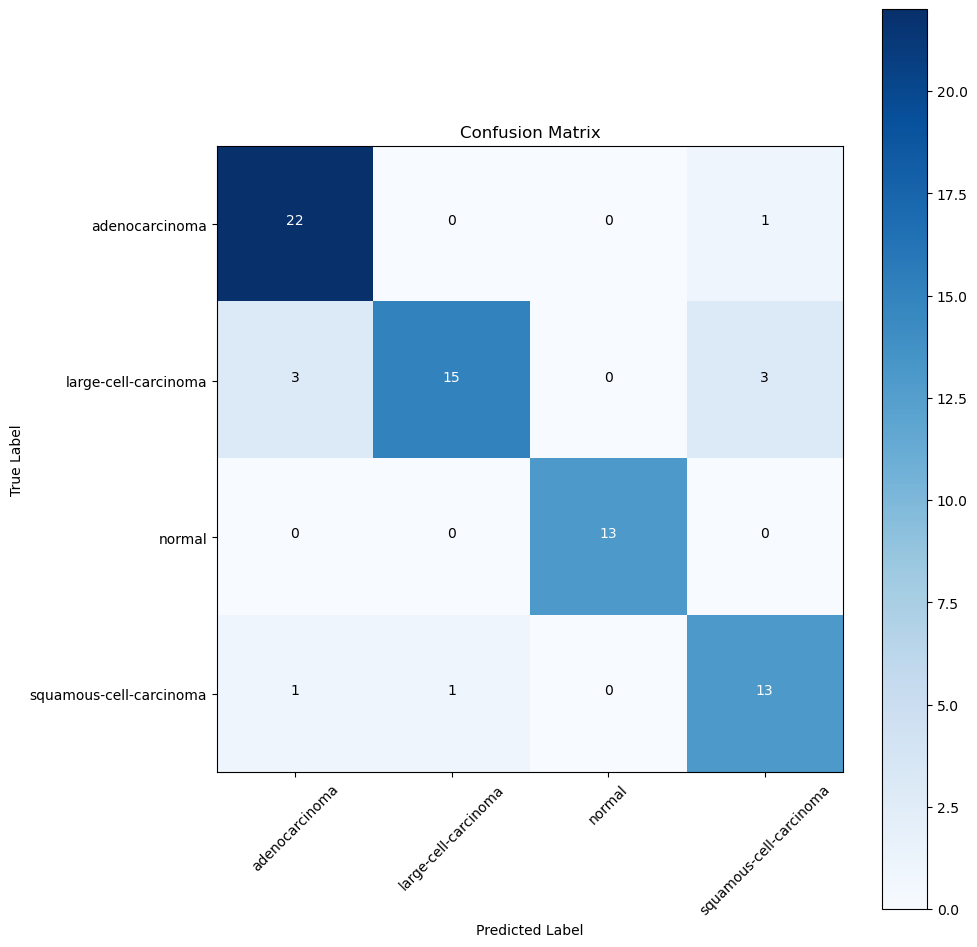

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

target_names = ['adenocarcinoma', 'large-cell-carcinoma', 'normal', 'squamous-cell-carcinoma']
# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm= cm, classes= target_names, title = 'Confusion Matrix')
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= target_names))